# **Waze Project**
**Course 4 - The Power of Statistics**

Your team is nearing the midpoint of their user churn project. So far, you’ve completed a project proposal, and used Python to explore and analyze Waze’s user data. You’ve also used Python to create data visualizations. The next step is to use statistical methods to analyze and interpret your data.

You receive a new email from Sylvester Esperanza, your project manager. Sylvester tells your team about a new request from leadership: to analyze the relationship between mean amount of rides and device type. You also discover follow-up emails from three other team members: May Santner, Chidi Ga, and Harriet Hadzic. These emails discuss the details of the analysis. They would like a statistical analysis of ride data based on device type. In particular, leadership wants to know if there is a statistically significant difference in mean amount of rides between iPhone® users and Android™ users. A final email from Chidi includes your specific assignment: to conduct a two-sample hypothesis test (t-test) to analyze the difference in the mean amount of rides between iPhone users and Android users.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 4 End-of-course project: Data exploration and hypothesis testing**

In this activity, you will explore the data provided and conduct a hypothesis test.
<br/>

**The purpose** of this project is to demostrate knowledge of how to conduct a two-sample hypothesis test.

**The goal** is to apply descriptive statistics and hypothesis testing in Python.
<br/>

*This activity has three parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct hypothesis testing
* How did computing descriptive statistics help you analyze your data?

* How did you formulate your null hypothesis and alternative hypothesis?

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your hypothesis test?

* What business recommendations do you propose based on your results?

<br/>


Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


In [1]:
# Import any relevant packages or libraries
### YOUR CODE HERE ###
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset into dataframe
df = pd.read_csv('./data/waze_dataset.csv')
df.insert(12, 'km_per_driving_day', df['driven_km_drives']/df['driving_days'] )

<h1 style=color:blue> CLEAN AND FILTER DATA BEFORE ANALYSIS </h1>

In [3]:
nan_data = False
outliers = False
mask_data = True

def quantile_replace_outliers(num_series, qtag):
    '''num_seres: a numerical pandas series
    qtag: the quantile to be calculated and used for replacement of outliers. As +real number <=1
    Function Documentation:
    Series.quantile(q=0.5, interpolation='linear')
    Return value at the given quantile.'''

    qvalue = num_series.quantile(q=qtag)
    new_series = num_series.where(num_series<qvalue, qvalue)
    return qvalue, new_series

if nan_data == False:
    df.dropna(axis=0, inplace=True)
    df.reset_index()
    df.isna().sum()
    
if outliers == False:
    outliers_columns = ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']

    for column in outliers_columns:
        quantile, tempseries = quantile_replace_outliers(df[column], 0.95)
        print('{}:\n max original = {:.3e}\n max_nooutliers = {:.3e}\n'
          .format(column, df[column].max(), tempseries.max()))
        df[column] = tempseries

if mask_data == True:
    # analyze only selected data

    # ALL users, no 0 data, all onboarding days
    temp_mask = (df['km_per_driving_day'] >= 1) & (df['total_sessions'] > 5) 
    df_original_len = len(df) 

    # very long drives users, no 0 data, more than 3 years using platform
    #tempmask = (df_filter['km_per_driving_day'] >= 400) & (df_filter['driving_days'] < 5) \
    #            & (df_filter['n_days_after_onboarding']>1000)

    # heavy users, no 0 data, more than 3 years using platform
    #tempmask = (df_filter['km_per_driving_day'] >= 400) & (df_filter['total_sessions'] > 5) \
    #            & (df_filter['n_days_after_onboarding']>1000)

    # heavy users, no 0 data, 1 year or less using platform
    #tempmask = (df_filter['km_per_driving_day'] >= 400) & (df_filter['total_sessions'] > 5) \
    #            & (df_filter['n_days_after_onboarding'] <= 366)
    
    df = df[temp_mask]
    df_new_len = len(df)
    print('Lenght of data frame changed from {} to {} after masking'.format(df_original_len, df_new_len ))
    

sessions:
 max original = 7.430e+02
 max_nooutliers = 2.430e+02

drives:
 max original = 5.960e+02
 max_nooutliers = 2.000e+02

total_sessions:
 max original = 1.216e+03
 max_nooutliers = 4.554e+02

driven_km_drives:
 max original = 2.118e+04
 max_nooutliers = 8.899e+03

duration_minutes_drives:
 max original = 1.585e+04
 max_nooutliers = 4.668e+03

Lenght of data frame changed from 14299 to 14275 after masking


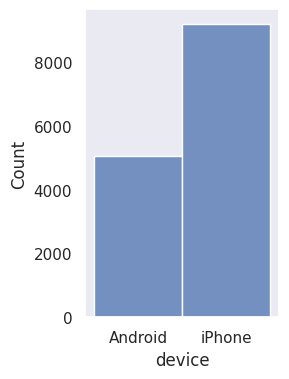

In [4]:
sns.set()
plt.figure(figsize=(2.5,4))
sns.histplot(data=df,
            x='device')
plt.grid(False)
plt.show()

You are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type. Calculate these averages.

In [8]:
### YOUR CODE HERE ###
# First separate the data according to device in new DFs
# then calculate the means:
devices_dfs = dict()
devices_drives_means = dict()
devices_drives_stds = dict()

mask_var = 'device'

for device in ['iPhone', 'Android']:
    temp_mask = df[mask_var] == device
    devices_dfs[device] = df[temp_mask]
    devices_drives_means[device] = devices_dfs[device]['drives'].mean()
    devices_drives_stds[device] = devices_dfs[device]['drives'].std()
    print('instances in df for {} = {}'.format(device, len(devices_dfs[device])))
    print('{} <drives> = {}'.format(device, devices_drives_means[device]))
    print('{} drives std = {}'.format(device, devices_drives_stds[device]))
    print('\n')

instances in df for iPhone = 9208
iPhone <drives> = 64.5581016507385
iPhone drives std = 55.51685023387986


instances in df for Android = 5067
Android <drives> = 63.18018551411092
Android drives std = 54.37257691280858




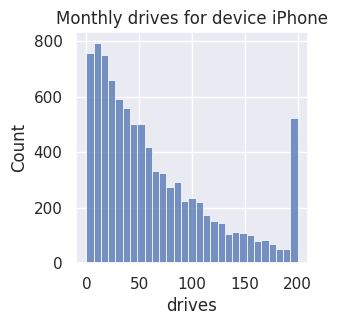

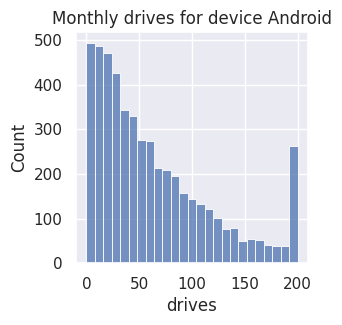

In [9]:
for device in ['iPhone', 'Android']:
    plt.figure(figsize=(3,3))
    sns.histplot(data=devices_dfs[device],
            x='drives')
    plt.grid(True)
    plt.title('Monthly drives for device {}'.format(device))
    plt.show()

<h1 style=color:blue> EXTRA: GET CONFIDENCE INTERVALS FOR THE DRIVES MEANS </h1>

In [10]:
# DEFINE FUNCTIONS
############################################################################################

def get_std_error_gauss_dist_sample(mean_or_prop, std_or_prop, n):
    '''function to calculate the standard error for a sample statistic either
    mean or proportion.
    Input:
    mean_or_prop: string: 'mean', 'proportion'
    std_or_prop: float: value to calculate std. error:
        For mean: standard deviation of sample
        For proportion: proportion (<=1)
    n: sample size    
    '''
    
    if mean_or_prop == 'mean':
        se = std_or_prop/(np.sqrt(n))
    elif mean_or_prop == 'proportion':
        se = np.sqrt(std_or_prop*(1-std_or_prop)/n)
        
    return se
    
############################################################################################

def get_margin_error_gauss_dist_sample(cl, n, mean_or_prop, std_or_prop):
    '''function to calculate the margin error for a sample statistic either
    mean or proportion. 
    Invokes get_std_error_gauss_dist_sample
    Input:
    1. cl: string: confidence level
    2. mean_or_prop: string: 'mean', 'proportion'
    3. std_or_prop: float: value to calculate std. error:
        For mean: standard deviation of sample
        For proportion: proportion (<=1)
    4. n: sample size    
    '''

    # create dictionary for cl and z-score values:
    allowed_cls = ('0.9', '0.95', '0.99')
    allowed_zscores = (1.65, 1.96, 2.58)
    allowed = tuple(zip(allowed_cls, allowed_zscores))
    allowed = dict(allowed)
    #print(allowed)
    
    if cl not in allowed_cls:
        print('allowed confidence leves are only: {}'.format(allowed_cls))
        return 1
    else:
        print('Calculating margin of error with CL={} for sample normal distribution'.format(cl))
        
        if mean_or_prop == 'mean':
            print('Margin of Error case: MEAN')
            se = get_std_error_gauss_dist_sample('mean',std_or_prop, n)
            
        elif mean_or_prop == 'proportion':
            print('Margin of Error case: PROPORTION')
            se = get_std_error_gauss_dist_sample('proportion',std_or_prop, n)
        
        print('se = {:.2f}'.format(se))
        print('z-score = {}'.format(allowed[cl]))
        moe = allowed[cl]*se
        return moe        
############################################################################################
    

In [11]:
# GET MOEs FOR  CL=0.95:

confidence_level = 0.95

for device in ['iPhone', 'Android']:
    # get margin of error:
    statistic_type = 'mean'
    moe = get_margin_error_gauss_dist_sample(str(confidence_level), len(df), statistic_type, devices_drives_stds[device])
    ci_upper = devices_drives_means[device] + moe
    ci_lower = devices_drives_means[device] - moe
    ci_sample = '{:.0f}% CI [{:.2f}, {:.2f}]'.format(confidence_level*100, ci_lower, ci_upper)
    ci_sample2 = '{:.0f}% CI {:.2f} +/- {:.2f}\n\n'.format(confidence_level*100, devices_drives_means[device], moe)
    print('For {}:'.format(device))
    print(ci_sample)
    print(ci_sample2)

Calculating margin of error with CL=0.95 for sample normal distribution
Margin of Error case: MEAN
se = 0.46
z-score = 1.96
For iPhone:
95% CI [63.65, 65.47]
95% CI 64.56 +/- 0.91


Calculating margin of error with CL=0.95 for sample normal distribution
Margin of Error case: MEAN
se = 0.46
z-score = 1.96
For Android:
95% CI [62.29, 64.07]
95% CI 63.18 +/- 0.89




Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a hypothesis test.


### **Task 3. Hypothesis testing**

Your goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).

Recall the difference between the null hypothesis ($H_0$) and the alternative hypothesis ($H_A$).

**Question:** What are your hypotheses for this data project?

<h1 style=color:blue> HYPOTHESIS TESTING: IS THE DIFFERENCE IN THE MEANS OF iPHONE AND ANDROID USERS STATISTICALLY SIGNIFICANT?</h1>

<ul style="color:purple;font-weight:700;font-size:12pt">
    <li> H0: (mean drives iPhone users) <= (mean drives Android users) </li>
    <li> H1: (mean drives iPhone users) > (mean drives Android users) </il>
</ul>

Next, choose 5% as the significance level and proceed with a two-sample t-test.

You can use the `stats.ttest_ind()` function to perform the test.


**Technical note**: The default for the argument `equal_var` in `stats.ttest_ind()` is `True`, which assumes population variances are equal. This equal variance assumption might not hold in practice (that is, there is no strong reason to assume that the two groups have the same variance); you can relax this assumption by setting `equal_var` to `False`, and `stats.ttest_ind()` will perform the unequal variances $t$-test (known as Welch's `t`-test). Refer to the [scipy t-test documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.


1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [16]:
# Perform the t-test
### YOUR CODE HERE ###

h1='greater'
significance_level = 0.05
a = devices_dfs['iPhone']['drives']
b = devices_dfs['Android']['drives']


ts, pvalue = stats.ttest_ind(a=a, b=b, equal_var=False, alternative=h1)

In [17]:
ttest_result = {'iphone_drives_mean_':[devices_drives_means['iPhone']],\
                'android_drives_mean_':[devices_drives_means['Android']],\
                'Significance_Level':[significance_level],\
                'test_statisitc':[ts],\
                'pvalue':[pvalue]}

In [23]:
pd.DataFrame(ttest_result, index=['result parameters t-test']).transpose()

,result parameters t-test
iphone_drives_mean_,64.558102
android_drives_mean_,63.180186
Significance_Level,0.050000
test_statisitc,1.438001
pvalue,0.075232


**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?

<p style="color:purple;font-weight:700;font-size:12pt">
    * H0: (mean drives iPhone users) $<=$ (mean drives Android users) <br>
    * H1: (mean drives iPhone users) $>$ (mean drives Android users) <br><br>
    $pvalue >$ significance level <br><br>
    Therefore: <br><br>
    * Observation under H0 is likely<br>
    * Fail to reject H0<br>
    * It can only be concluded that data is consistent with H0 but cannot confirm H1
    
    
</p>

In [24]:
# Check it from the other side:

# h0: mean_iphone >= mean_android
# h1: mean_iphone < mean_android

h1='less'
significance_level = 0.05
a = devices_dfs['iPhone']['drives']
b = devices_dfs['Android']['drives']

ts, pvalue = stats.ttest_ind(a=a, b=b, equal_var=False, alternative=h1)

ttest_result = {'iphone_drives_mean_':[devices_drives_means['iPhone']],\
                'android_drives_mean_':[devices_drives_means['Android']],\
                'Significance_Level':[significance_level],\
                'test_statisitc':[ts],\
                'pvalue':[pvalue]}

pd.DataFrame(ttest_result, index=['result parameters t-test']).transpose()

,result parameters t-test
iphone_drives_mean_,64.558102
android_drives_mean_,63.180186
Significance_Level,0.050000
test_statisitc,1.438001
pvalue,0.924768


<p style="color:purple;font-weight:700;font-size:12pt">
    * H0: (mean drives iPhone users) $>=$ (mean drives Android users) <br>
    * H1: (mean drives iPhone users) $<$ (mean drives Android users) <br><br>
    $pvalue >>$ significance level <br><br>
    Therefore: <br><br>
    * Observation under H0 is highly likely<br>
    * Fail to reject H0<br>
    * It can only be concluded that data is consistent with H0 but cannot confirm H1
    
</p>

### **Task 4. Communicate insights with stakeholders**

Now that you've completed your hypothesis test, the next step is to share your findings with the Waze leadership team. Consider the following question as you prepare to write your executive summary:

* What business insight(s) can you draw from the result of your hypothesis test?

<p style="color:brown;font-weight:700;font-size:20px">
    The difference observed in the mean values of the monthly drives betwenn iPhone users and Android users <br>
    is not significant according to the analyzed data.<br><br>
    The test was made from 2 perspectives:
    1. Try to confirm iPhone users use more the app than Android users
    2. Try to confirm iPhone users use less the app than Android users
    <br><br>
    From both perspectives no statistical significance of the observations could be confirmed
    
</p>


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

<h1 style=color:blue>INTERPRETATION OF T-TEST RESULTS</h1>

<p style=color:green;font-weight:700;font-size:12pt>
       The difference observed in the mean values of the monthly drives betwenn iPhone users and Android users <br>
        is not significant according to the analyzed data.<br><br>
        The test was made from 2 perspectives and none of them confirmed statistical significance of the observations in the sample:
        <ol  style=color:green;font-weight:700;font-size:12pt>
            <li> Try to confirm iPhone users use more the app than Android users </li>
            <li> Try to confirm iPhone users use less the app than Android users </li>
        </ol><br>
        
</p>